In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import warnings
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [2]:
%matplotlib inline

In [4]:
# Create a path for importing
path = 'C:/Users/kaan/ML_2/02 Data/Weather_pics'

In [5]:
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [6]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [7]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [10]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 45,
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 404ms/step - accuracy: 0.6157 - loss: 0.1072 - val_accuracy: 0.7277 - val_loss: 0.0901
Epoch 2/45
 1/28 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.6875 - loss: 0.1054

C:\Users\kaan\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.6875 - loss: 0.1054 - val_accuracy: 0.7188 - val_loss: 0.0877
Epoch 3/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 336ms/step - accuracy: 0.6951 - loss: 0.1045 - val_accuracy: 0.4821 - val_loss: 0.1766
Epoch 4/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6875 - loss: 0.1138 - val_accuracy: 0.5759 - val_loss: 0.1517
Epoch 5/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 357ms/step - accuracy: 0.7330 - loss: 0.0850 - val_accuracy: 0.7277 - val_loss: 0.0861
Epoch 6/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.6562 - loss: 0.1243 - val_accuracy: 0.6741 - val_loss: 0.0978
Epoch 7/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 363ms/step - accuracy: 0.7860 - loss: 0.0736 - val_accuracy: 0.6920 - val_loss: 0.1214
Epoch 8/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.7500 - loss: 0.0896 - val_accuracy: 0.7188 - val_loss: 0.1117
Epoch 9/45
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 350ms/step - accuracy: 0.8412 - loss: 0.0576 - val_accuracy: 0.7812 - val_l

### reached 93% accuracy and 0.02 loss

In [11]:
results = pd.DataFrame(model.history.history)

In [12]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

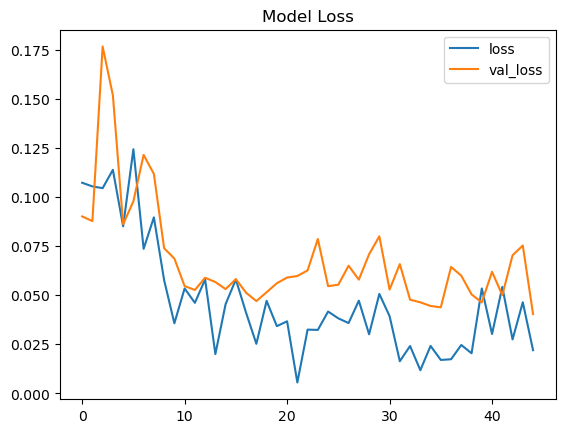

In [13]:
plt.show()

In [14]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

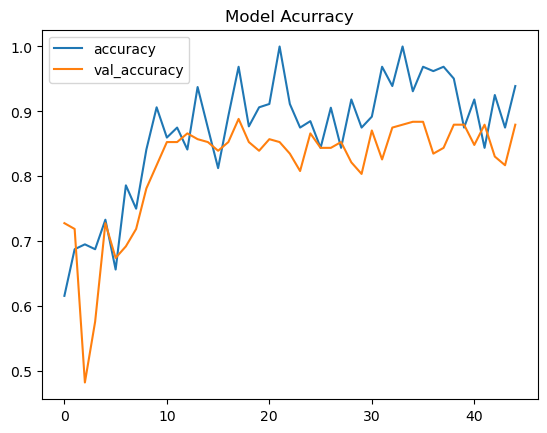

In [15]:
plt.show()

In [16]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9390103816986084, Val_Accuracy: 0.8794642686843872
Loss: 0.022006383165717125, Val_Loss: 0.040408287197351456


#### Confusion matrix

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


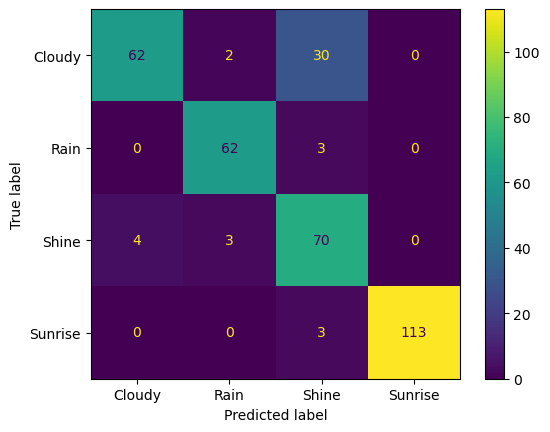

In [18]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

In [19]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


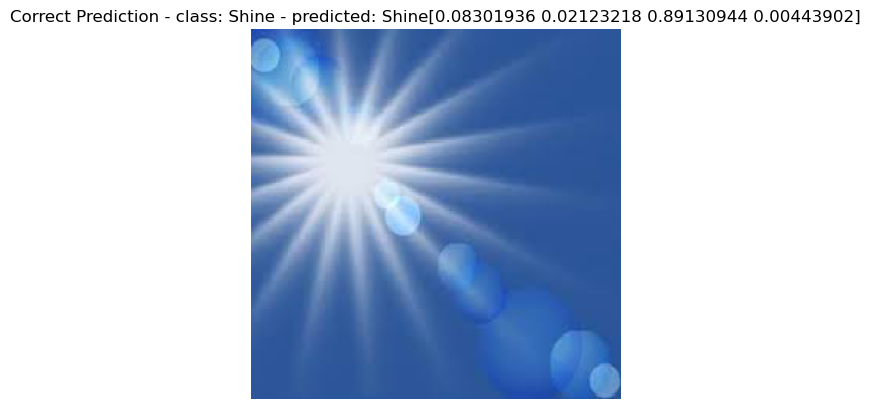

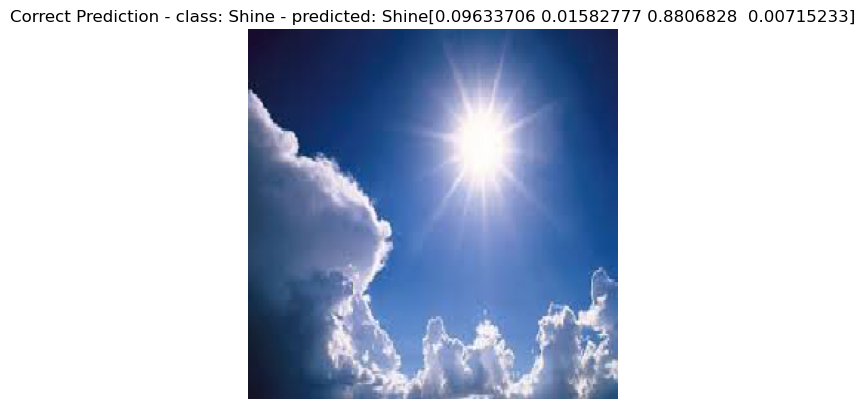

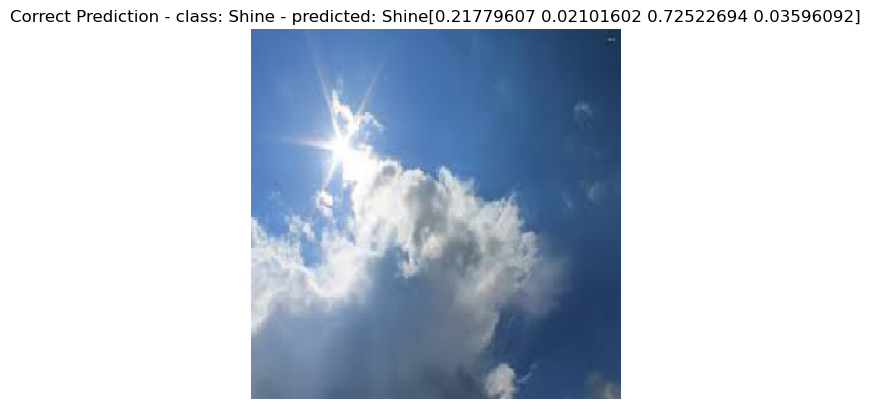

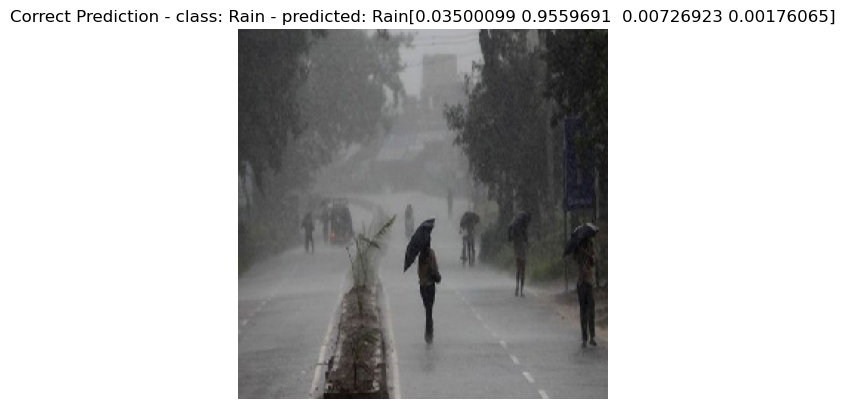

In [22]:
predict_one(model, 4) #<--you can show multiple pictures with this command. Just fill in the number you want to see.
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted class: Rain
Probabilities (Cloudy, Rain, Shine, Sunrise):
[1.6289469e-07 9.9996781e-01 3.1863012e-05 1.5676623e-07]


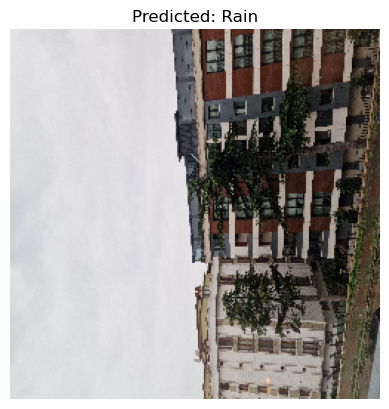

In [28]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_size = (250, 250)
img_path = r'C:\Users\kaan\ML_2\02 Data\Weather_pics\my_town.jpg'

img = load_img(img_path, target_size=img_size, color_mode='rgb')


x = img_to_array(img)       
x = x / 255.0              
x = np.expand_dims(x, axis=0)   


pred = model.predict(x)[0]
pred_idx = np.argmax(pred)
pred_class = class_names[pred_idx]


print("Predicted class:", pred_class)
print("Probabilities (Cloudy, Rain, Shine, Sunrise):")
print(pred)


plt.imshow(img)
plt.title(f"Predicted: {pred_class}")
plt.axis('off')
plt.show()